In [2]:
# %load ../standard_import.txt
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress


%matplotlib inline


### Non Linear Regression

* Complex models are rarely linear
  * This is not to say that linear models are not used 

* Linearity assumption is often "good enough", particularly for:

    
  * Quickly prototyping simple models that require full interpretability

  * Tackling questions that not well defined to benefit from more complex models
  
    * Always in search of better models but how much leverage but always evaluate how much more leverage a precise model going to provide 
  

### Tell-Tale or non-linearity - 1

* The model clearly looks non-linear

* we'll generate data from the following model:

$$
y = 30 -0.5 x +0.005 x^2 + \epsilon
$$

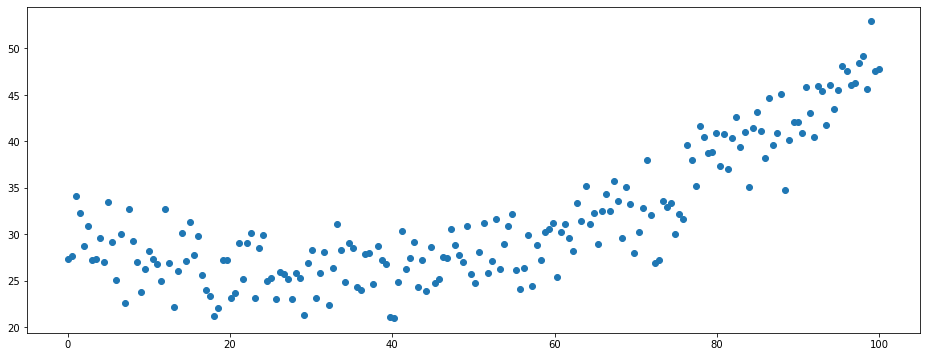

In [3]:
plt.figure(figsize=(16,6))

x = np.linspace(0,100, 200)
errors = np.random.normal(0,3, size=200)
y = 30 + (-0.3 * x)+ (0.005*x**2) +  errors
plt.scatter(x,y)

### Tell-Tale or non-linearity - 2

* Residuals are not normally distributed
  * Recall that the the assumption is that $\epsilon \sim \mathcal{N}(\mu,\sigma)$
  * this is a violation of the assumption

Text(0.5, 1.0, 'Residuals plot')

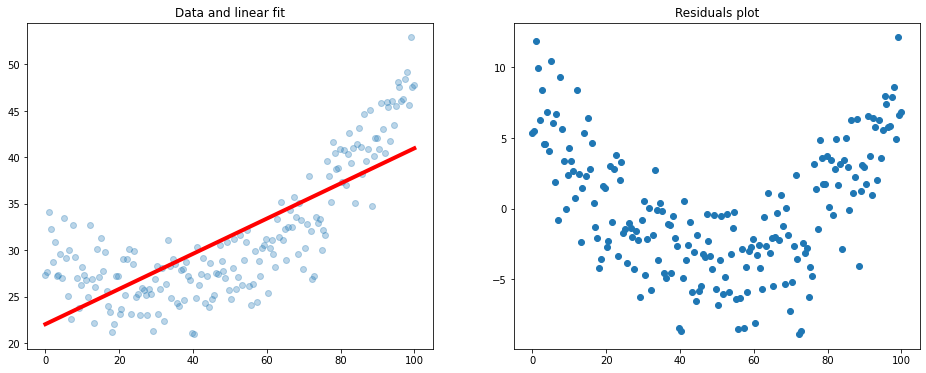

In [4]:
lm = linregress(x, y)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.scatter(x, y, alpha=0.3)
plt.plot(x, lm.intercept + lm.slope * x, color='r', linewidth=4)
plt.title("Data and linear fit")



RSS_vals = []
for (x_i, y_i) in zip(x,y):
    y_hat = lm.intercept + lm.slope * x_i 
    RSS_vals.append(y_i - y_hat)

plt.subplot(1,2,2)
  
plt.scatter(x, RSS_vals)
plt.title("Residuals plot")


### How to Determine a Non-Linear Model

* How do we handle the case data is clearly non-linear?

* Within a small region, the data will most likely be liner

* for instance, we look at the region $x \in [39,41]$

In [5]:
small_range = x[(x >= 35) & (x <= 45)]
small_range

array([35.1758794 , 35.67839196, 36.18090452, 36.68341709, 37.18592965,
       37.68844221, 38.19095477, 38.69346734, 39.1959799 , 39.69849246,
       40.20100503, 40.70351759, 41.20603015, 41.70854271, 42.21105528,
       42.71356784, 43.2160804 , 43.71859296, 44.22110553, 44.72361809])

In [6]:
positions = np.where((x >= 35) & (x <= 45))
x[positions]

array([35.1758794 , 35.67839196, 36.18090452, 36.68341709, 37.18592965,
       37.68844221, 38.19095477, 38.69346734, 39.1959799 , 39.69849246,
       40.20100503, 40.70351759, 41.20603015, 41.70854271, 42.21105528,
       42.71356784, 43.2160804 , 43.71859296, 44.22110553, 44.72361809])

In [7]:
y[positions]

array([28.57245559, 24.29555139, 24.01850498, 27.93421004, 27.96305523,
       24.62352023, 28.80020738, 27.28996278, 26.86283259, 21.10523822,
       21.00725148, 24.83512844, 30.39480636, 26.3143911 , 27.489562  ,
       29.21733235, 24.36007489, 27.24695388, 23.91593736, 28.68736944])

Text(0.5, 1.0, 'Residuals plot')

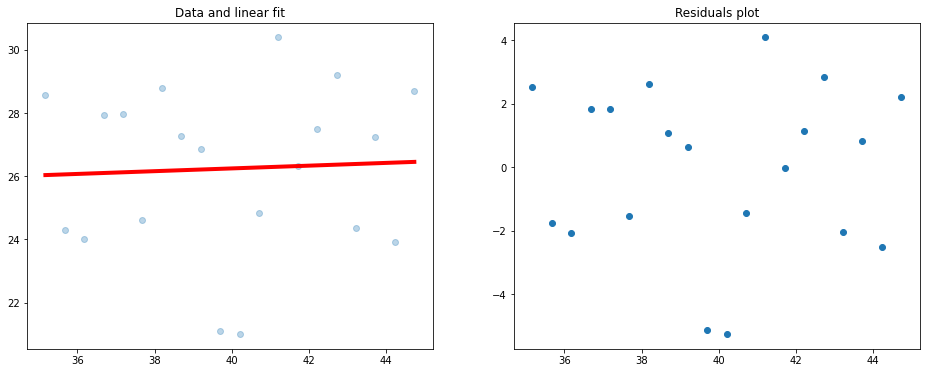

In [8]:
### How to Determine a Non-Linear Model

lm = linregress(x, y)

plt.figure(figsize=(16,6))
lm_2 =  linregress(x[positions], y[positions])
plt.subplot(1,2,1)
plt.scatter(x[positions], y[positions], alpha=0.3)
plt.plot(x[positions], lm_2.intercept + lm_2.slope * x[positions], color='r', linewidth=4)
plt.title("Data and linear fit")


RSS_vals = []
for (x_i, y_i) in zip(x[positions], y[positions]):
    y_hat = lm_2.intercept + lm_2.slope * x_i 
    RSS_vals.append(y_i - y_hat)

plt.subplot(1,2,2)
  
plt.scatter(x[positions], RSS_vals)
plt.title("Residuals plot")


### How to Model Non-Linear Dataset

* A naive approach is perhaps to compute the model as the average of some points above and below that point 
*  for example, for $x=40$, we need to take 3 observed data points immediately before and after
  * say for instance we take 5 points
 
* This is called a nearest Neighbor regression

* Here, let's just the mean as a prediction within a small region 


In [9]:
np.searchsorted(x, 70), 

(140,)

In [10]:
x[np.searchsorted(x, 70)]

70.35175879396985

In [11]:
pos = np.searchsorted(x, 70)
print(x[pos:  pos+5])
print(x[pos-5:  pos])

[70.35175879 70.85427136 71.35678392 71.85929648 72.36180905]
[67.83919598 68.34170854 68.84422111 69.34673367 69.84924623]


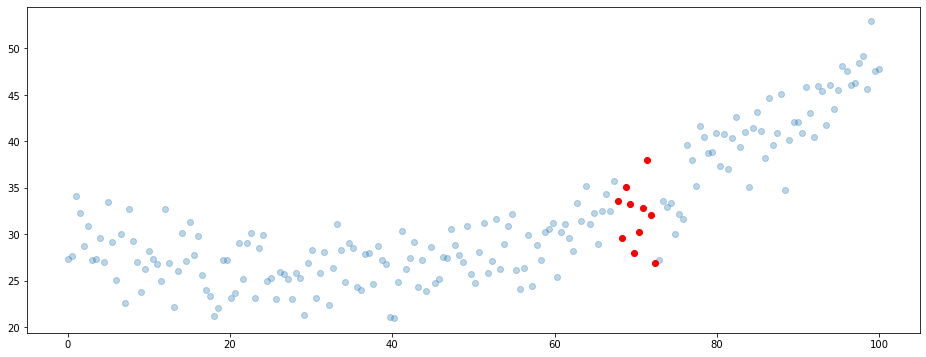

In [12]:
plt.figure(figsize=(16,6))

neighbors = np.arange(pos-5, pos+5)
plt.scatter(x, y, alpha=0.3)
plt.scatter(x[neighbors], y[neighbors], color="red")


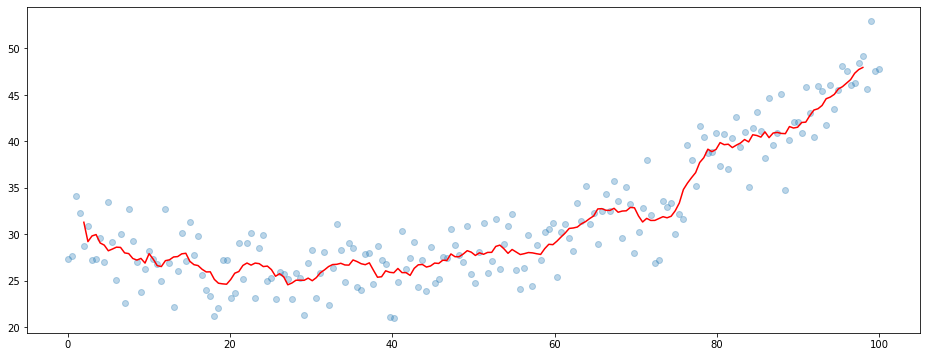

In [13]:
plt.figure(figsize=(16,6))

reg_line = []
for i in x[4:-4]:
    pos = pos = np.searchsorted(x, i)
    neighbors = np.arange(pos-5, pos+5)
    reg_line.append(y[neighbors].mean())

plt.scatter(x, y, alpha=0.3)
plt.plot(x[4:-4], reg_line, color="red")

### Problems with this approach

What are the issues with this approach?



### Problems with Nearest Neighbor Regression

* Slow, imagine in the case with a large number of predictors

  * Does not scale well with a large number of parameters

* Highly affected by outliers

* We're missing values at the extremities
    * We cannot use for prediction



### Step Functions

* We can remedy these shortcomings by discretizing the $x-$axis

* Break the range of $x$ into bins, and fit a different constant in each bin

  * Such a group-specific constant can be `mean` as in nearest neighbors
  
* This amounts to converting a continuous variable into an ordered categorical variable

* This is called a step function


In [14]:
intervals = np.split(np.arange(len(x)), 10)
intervals

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39]),
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59]),
 array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
        77, 78, 79]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
        97, 98, 99]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119]),
 array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139]),
 array([140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159]),
 array([160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179]),
 array([180, 181, 182, 183, 184, 185, 

In [15]:
intervals[4]

array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99])

In [16]:
x[intervals[4]]

array([40.20100503, 40.70351759, 41.20603015, 41.70854271, 42.21105528,
       42.71356784, 43.2160804 , 43.71859296, 44.22110553, 44.72361809,
       45.22613065, 45.72864322, 46.23115578, 46.73366834, 47.2361809 ,
       47.73869347, 48.24120603, 48.74371859, 49.24623116, 49.74874372])

In [17]:
y[intervals[4]].mean()

26.97413657471901

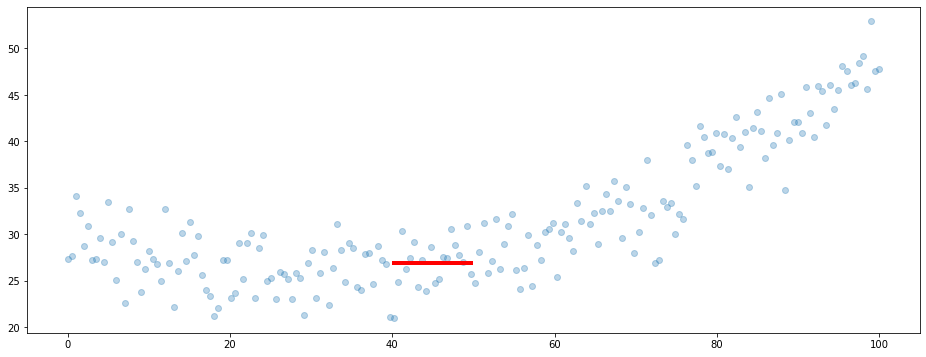

In [18]:
plt.figure(figsize=(16,6))

plt.scatter(x, y, alpha=0.3)
plt.plot(x[intervals[4]], [y[intervals[4]].mean()] * len(intervals[4]), color="red", linewidth=4)


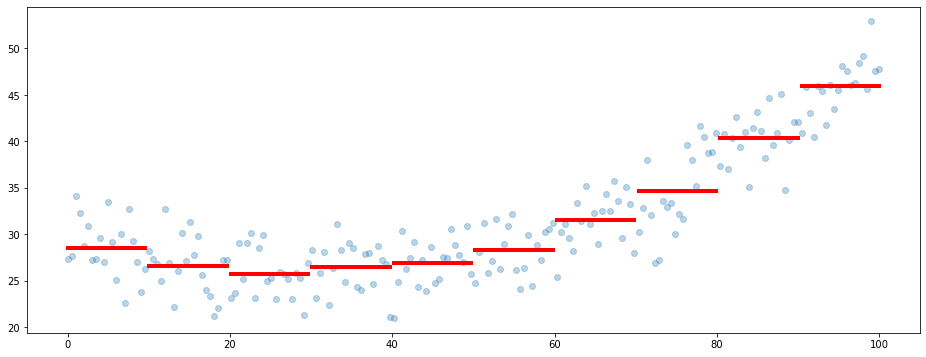

In [19]:
plt.figure(figsize=(16,6))
plt.scatter(x, y, alpha=0.3)
means = []
for i in range(len(intervals)):
    means.append(y[intervals[i]].mean())
    plt.plot(x[intervals[i]], [y[intervals[i]].mean()] * len(intervals[i]), color="red", linewidth=4)



### Shortcoming of Step Function

* How do you interpret sudden changes between two points close on the x-axis?

* Choice of cutpoints or "knots" can be problematic
  * The step function would have been different if we had split the function into 11, 9 or 13 intervals
* Arbitrary knots can lead to substantial variation issues?
  

### Plynomial Regression

* Rather than model the data with a 1st-degree polynomial, we will use a higher degree polynomial 

  * Ex. second, third or even higher if needed



* A 1st degree polynomial

$$
    y = \beta_0 + \beta_1 x
$$

* 3rd degree polynomial 

$$ 
    y = \beta_0 ~~+~~ \beta_1 x ~~+~~ \beta_2x^2 ~~+~~ \beta_3x^3 
$$

### Using Linear Model in sklearn

* Two step process:

    1. Trnasform $x$ into higher degree features
        
    2. Fit the model using the transformed polynomial features.




### Inferring  Polynomial Features

* From the implementation point of view, this is just plain Ordinary Least Squares 

Transorm: 

$ 
    y = \beta_0 ~~+~~ \beta_1 x ~~+~~ \beta_2x^2 ~~+~~ \beta_3x^3 
$

into:   
$ 
    y = \beta_0 * 1 ~~+~~ \beta_1 \cdot A ~~+~~ \beta_2 \cdot B ~~+~~ \beta_3 \cdot C,
$

$ \mbox{, such that  }A=x\mbox{, }B=x^2\mbox{ and }C=x^3 $

* We can now consider A, B, and C as new features of the model and use the same linear multivariate linear regression

    * The new representation of $y$ is still considered a linear model 
      * coefficients associated with the features are still linear. 
        * $x^m$ where $m \ne 1$ is now just another feature.



## Using Linear Model in sklearn - Cont'd

Transorm: 
$$ 
    y = \beta_0 ~~+~~ \beta_1 x ~~+~~ \beta_2x^2 ~~+~~ \beta_3x^3 
$$
into:   
$$ 
    y = \beta_0 ~~+~~ \beta_1 \cdot A ~~+~~ \beta_2 \cdot B ~~+~~ \beta_3 \cdot C\mbox{, where  }A=x\mbox{, }B=x^2\mbox{ and }C=x^3
$$


* This can be easily done using `PolynomialFeatures`

    * "Polynomial Features are all polynomial combinations of the features with degree less than or equal to the specified degree." scikit-learn Documentation
    
    * Takes data as column vector (same as other scikit-learn libraries we have used)  

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

v = np.array([1,2,3,4,5])

poly.fit_transform(v.reshape(-1,1))

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

### Using Linear Model in Sklearn - Cont'd

* For $v=[1, 2, 3, 4, 5]$ 

* In polynomial regression (3rd degree polynomial)

$$
v_0{'} = (v_0^0 = 1,~~A=v_0^1,~~B=v_0^2,~~C =v_0^3) 
$$

* Therefore

$$
\begin{split}
V{'} =& [
            [  1.,   1.,   1.,   1.], \\
         &  [  1.,   2.,   4.,   8.], \\
         &  [  1.,   3.,   9.,  27.], \\
         &  [  1.,   4.,  16.,  64.], \\
         &  [  1.,   5.,  25., 125.]
     ]
\end{split}
$$



In [23]:
# we take a small subsample of x, 
np.random.seed(46)
subset_indices = np.random.choice(np.arange(len(x)), size=20)
subset_indices.sort()
subset_indices


array([ 22,  30,  31,  32,  40,  55,  59,  60,  69,  72,  79,  93,  98,
       116, 130, 146, 147, 155, 186, 189])

In [24]:
x[subset_indices]

array([11.05527638, 15.07537688, 15.57788945, 16.08040201, 20.10050251,
       27.63819095, 29.64824121, 30.15075377, 34.67336683, 36.18090452,
       39.69849246, 46.73366834, 49.24623116, 58.29145729, 65.32663317,
       73.36683417, 73.86934673, 77.88944724, 93.46733668, 94.97487437])

LinearRegression()

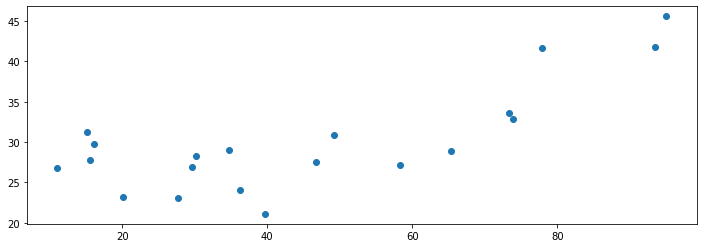

In [31]:
plt.figure(figsize=(12,4))

plt.scatter(x[subset_indices], y[subset_indices])

from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
X_vals_transformed = poly.fit_transform(x[subset_indices].reshape(-1,1))    

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[subset_indices].reshape(-1,1))

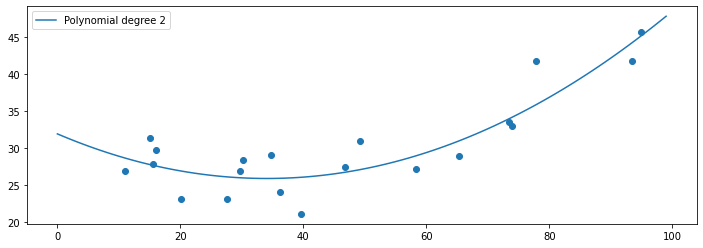

In [32]:
plt.figure(figsize=(12,4))
x_axis= np.arange(0, max(x)).reshape(-1,1)
X_axis_transformed = poly.transform(x_axis)
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_axis, y_hat, label= "Polynomial degree %s" % 2)
plt.scatter(x[subset_indices], y[subset_indices])

plt.legend() 

### Increasing the Polynomial  Degree

* We said earlier that the best model is the one that minimizes the RSS

* In the above example, we see that we can improve the fit by choosing a higher-degree polynomial





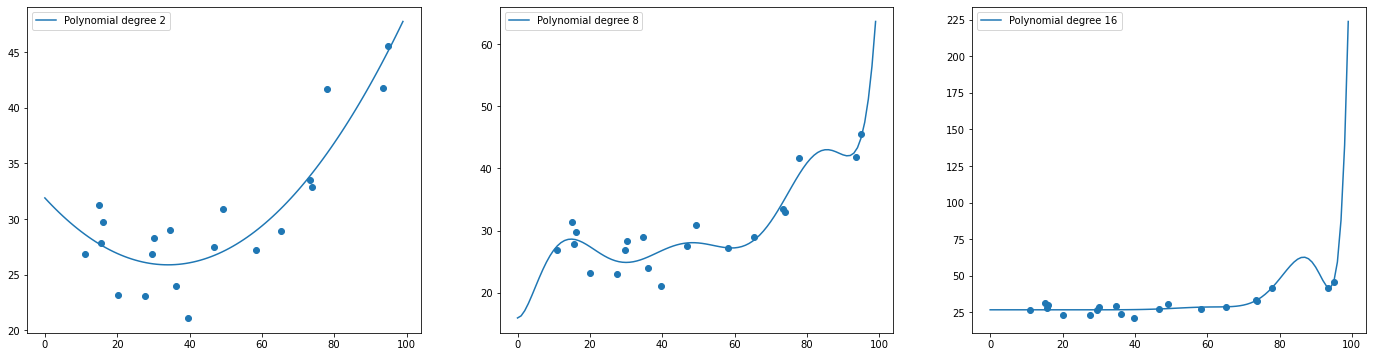

In [33]:

from sklearn import linear_model

np.random

plt.figure(figsize=(24,6))


x_axis= np.arange(0,max(x)).reshape(-1,1)

for i, polDegree in enumerate([2, 8, 16]):
    plt.subplot(1,3,i+1)

    plt.scatter(x[subset_indices], y[subset_indices])
    poly = PolynomialFeatures(degree=polDegree)
    X_vals_transformed = poly.fit_transform(x[subset_indices].reshape(-1,1))    
    X_axis_transformed = poly.transform(x_axis)

    lin = linear_model.LinearRegression()
    lin.fit(X_vals_transformed, y[subset_indices].reshape(-1,1))
    y_hat =  lin.predict(X_axis_transformed)

    plt.plot(x_axis, y_hat, label= "Polynomial degree %s" % polDegree)
    plt.legend() 

### Shortcoming of Higher Order Polynomials

* For a dataset $n$, an $n_{th}$ degree polynomial will fit perfectly 
    * The curve will have n-1 turning points.
    * If the data quadratic in reality, we will have a lot of oscillations towards the ends

* Overfits the data
    * Oscillations are very unlikely to be characteristic of the data
    
    * The model is capturing the noise in the data. 
    
* This is an example of over-fitting. 
  * Even though this model passes through most of the data, it will fail to generalize on unseen data.
  


### Question

* How do we select the best Polynomial Degree(complexity of the model)?


### Question

* Again, we can use cross-validation
  * This strategy will work for most machine or statistical learning approaches

1. Shuffle the dataset.
2. Split the dataset into k subsets (say 10)
3. For each unique subset: 
  * 3.1 hold out one of the subsets or test data set 
  * 3.2 use the remaining k-1 subsets to fit your model 
  * 3.3 test the resulting model on the held out subset 
  * 3.4 stick with the model param that that yields the best evaluation score

### Piecewise Polynomials

* Generalization of piecewise step functions and improvement over polynomials

* Instead of a single polynomial, we use a polynomial in regions defined by knots

  * To avoid sharp edges between polynomial, like those generated step function, by imposing continuity
      * i.e., differentiable

* Using more knots leads to a more flexible piecewise polynomial

* we will illustrate it with a simple linear regression (i.e., degree =1 ) 


In [35]:
# two nots (30 and 55)
# three regions (< 30, >=30 and <55, >= 55)


x_1_idx = np.where(x<30)
x_2_idx = np.where((x>=30) & (x < 55))
x_3_idx = np.where(x >= 55)


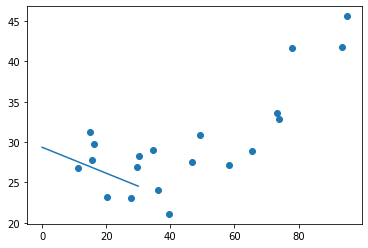

In [36]:
plt.scatter(x[subset_indices], y[subset_indices])

x_1_axis = np.arange(0, 30, 0.05).reshape(-1,1)

poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x[x_1_idx].reshape(-1,1))    
X_axis_transformed = poly.transform(x_1_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[x_1_idx].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_1_axis, y_hat, label= "Polynomial degree %s" % polDegree)




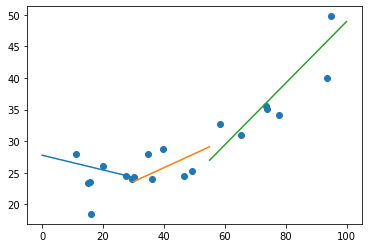

In [65]:
plt.scatter(x[subset_indices], y[subset_indices])

x_1_axis = np.arange(0, 30, 0.05).reshape(-1,1)

poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x[x_1_idx].reshape(-1,1))    
X_axis_transformed = poly.transform(x_1_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[x_1_idx].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_1_axis, y_hat, label= "Polynomial degree %s" % polDegree)



x_2_axis = np.arange(30, 55, 0.05).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x[x_2_idx].reshape(-1,1))    
X_axis_transformed = poly.transform(x_2_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[x_2_idx].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_2_axis, y_hat, label= "Polynomial degree %s" % polDegree)


x_3_axis = np.arange(55, 100, 0.05).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x[x_3_idx].reshape(-1,1))    
X_axis_transformed = poly.transform(x_3_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[x_3_idx].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_3_axis, y_hat, label= "Polynomial degree %s" % polDegree)



### What Do We Want to do? 

* We want to create a smooth function
  
  * Given a knot $x_i$, belonging to interval $j$, we want the the model resulting from the combination of $f_{j-1}(x_i)$ and $f_j(x_i)$ is continuous at the knot
   
    * Continuous function is a function that does not have any abrupt changes in value 
    * Very small changes $x$ should result in very small changes in $y$, i.e., $f_{j-1}(x_i) \approx f_j(x_i)$

* This is called the matching condition




### "Hacking"  the matching condition

* Split the data into 4 new intervals
* Instead of completely independent intervals, we force the intervals to overlap by 1 data point
The knots will be part of both models, therefore causing the models to satisfy $f_{j-1}(x_i) \approx f_j(x_i)$
* In the models, the solution is typically implemented by requiring that:
  * $f_{j-1}'$ and $f_j'$ exist at $x_i$. The curves are continuous $x_i$
  * $f_{j-1}' \approx f_j'$ the curves are close at $x_i$
  



In [42]:

x_1_subset = x[subset_indices[0:8]]
x_2_subset = x[subset_indices[7:12]]
x_3_subset = x[subset_indices[11:14]]
x_4_subset = x[subset_indices[13:]]

y_1_subset = y[subset_indices[0:8]]
y_2_subset = y[subset_indices[7:12]]
y_3_subset = y[subset_indices[11:14]]
y_4_subset = y[subset_indices[13:]]


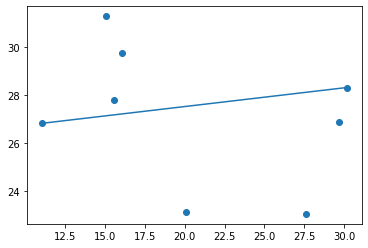

In [43]:
plt.scatter(x_1_subset, y_1_subset)


x_1_axis = np.arange(min(x_1_subset), max(x_1_subset), 0.05).reshape(-1,1)

poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_1_subset[[0,-1]].reshape(-1,1))    
X_axis_transformed = poly.transform(x_1_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_1_subset[[0,-1]].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_1_axis, y_hat, label= "Polynomial degree %s" % polDegree)





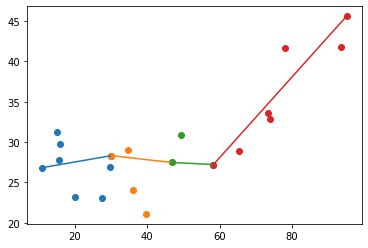

In [44]:
plt.scatter(x_1_subset, y_1_subset)
x_1_axis = np.arange(min(x_1_subset), max(x_1_subset), 0.05).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_1_subset[[0,-1]].reshape(-1,1))    
X_axis_transformed = poly.transform(x_1_axis)
lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_1_subset[[0,-1]].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_1_axis, y_hat, label= "Polynomial degree %s" % polDegree)



plt.scatter(x_2_subset, y_2_subset)
x_2_axis = np.arange(min(x_2_subset), max(x_2_subset), 0.05).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_2_subset[[0,-1]].reshape(-1,1))    
X_axis_transformed = poly.transform(x_2_axis)
lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_2_subset[[0,-1]].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_2_axis, y_hat, label= "Polynomial degree %s" % polDegree)


plt.scatter(x_3_subset, y_3_subset)
x_3_axis = np.arange(min(x_3_subset), max(x_3_subset), 0.05).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_3_subset[[0,-1]].reshape(-1,1))    
X_axis_transformed = poly.transform(x_3_axis)
lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_3_subset[[0,-1]].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_3_axis, y_hat, label= "Polynomial degree %s" % polDegree)


plt.scatter(x_4_subset, y_4_subset)
x_4_axis = np.arange(min(x_4_subset), max(x_4_subset), 0.05).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_4_subset[[0,-1]].reshape(-1,1))    
X_axis_transformed = poly.transform(x_4_axis)
lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_4_subset[[0,-1]].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_4_axis, y_hat, label= "Polynomial degree %s" % polDegree)

### What do we Want to do? - Cont'd

* In addition to the above, we want curves to be smooth at the knots

* We want second derivative to:
  * $f_{j-1}'' \approx f_j''$ the curves are smooth at $x_i$


* The second derivative indicates whether the function's slope is increasing or decreasing at that $x_i$

        * Guarantees that transitions between the curve are smooth


* In math, B-spline or basis spline is a spline function that has minimal support with respect to a given degree smoothness, and domain partition. Any spline function of given degree can be expressed as a linear combination of B-splines of that degree.





In [72]:
# we take a small subsample of x, 
# results are more dramatic


from patsy import dmatrix
import statsmodels.api as sm
# Specifying 3 knots
transformed_x = dmatrix("bs(x, knots=(25,40,60), degree=1)",
                        {"x": x[subset_indices]}, return_type='dataframe')
model_4 = sm.GLM(y[subset_indices], transformed_x).fit()

pred4 = model_4.predict(dmatrix("bs(x_axis, knots=(25,40,60), degree=1)",
                              {"x_axis": x_axis}, return_type='dataframe'))
model_4.params


Intercept                                 24.366100
bs(x, knots=(25, 40, 60), degree=1)[0]    -1.014354
bs(x, knots=(25, 40, 60), degree=1)[1]     2.067932
bs(x, knots=(25, 40, 60), degree=1)[2]     4.637655
bs(x, knots=(25, 40, 60), degree=1)[3]    20.277024
dtype: float64

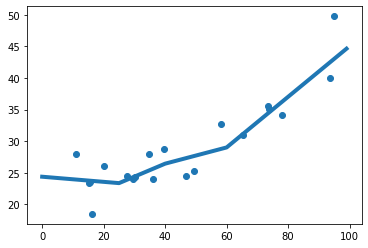

In [73]:
plt.scatter(x[subset_indices], y[subset_indices])
plt.plot(x_axis, pred4, linewidth=4)

### Cubic Splines
* Using line does not provide for "local" flexibility at the knots
* S line has only two degrees of freedom, $(a,b)$ in $y =a + bx$
  * Forcing the line to go through two points, we have used both degrees of freedom
* A quadratic has three degrees of freedom $(a,b,c)$ in $y =a + b x +c x^2$
  * Forcing a quadratic to go through two points and fixing the derivative at one of the knots we have used all three degrees of freedom
    * No way to fix the derivative at the second knot.
    
* A cubic spline has four degrees of freedom $(a,b,c,d)$ in $y =a + b x +c x^2 + d x^3$




### Cubic Splines - Cont'd


* A cubic spline with knots at $\xi_k$, $k = 1, . . . , K$ is a piecewise cubic polynomial with continuous derivatives up to order 2 at each knot



In [49]:
# we take a small subsample of x, 

from patsy import dmatrix
import statsmodels.api as sm

# Specifying 3 knots for the bsplines model in statsmodels 
x_axis = np.arange(min(x[subset_indices]), max(x[subset_indices]), 0.05).reshape(-1,1)
transformed_x = dmatrix("bs(x, degree=3, df=4)",
                        {"x": x[subset_indices]}, return_type='dataframe')
model_4 = sm.GLM(y[subset_indices], transformed_x).fit()

pred4 = model_4.predict(dmatrix("bs(x_axis, degree=3, df=4)",
                              {"x_axis": x_axis}, return_type='dataframe'))
model_4.params


Intercept                   29.020879
bs(x, degree=2, df=4)[0]    -2.819828
bs(x, degree=2, df=4)[1]    -3.934024
bs(x, degree=2, df=4)[2]     4.396258
bs(x, degree=2, df=4)[3]    15.742811
dtype: float64

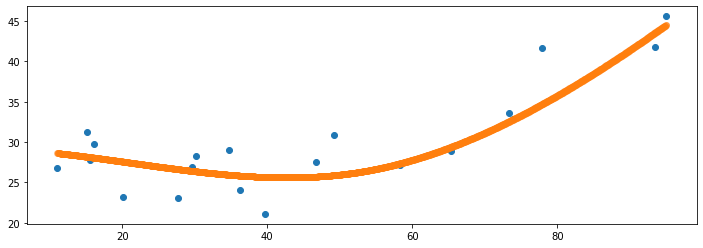

In [48]:
plt.figure(figsize=(12,4))
plt.scatter(x[subset_indices], y[subset_indices])
plt.scatter(x_axis, pred4, alpha=0.4)

### How Many Knots to Use? 


* Simple (naive approach) is to try out different numbers of knots and see which produces the best looking curve
* A more objective approach is to use cross-validation
1. Shuffle the dataset.
2. Split the dataset into k subsets (say 10)
3. For each unique subset:
  3.1 hold out one of the subsets or test data set
  3.2 use the remaining subsets to fit your model
  3.3 test the resulting model on the held out subset
  3.4 stick with the model param that that yields the best evaluation score

### Where do you Choose the Knots


* In practice, it's common to place knots uniformly
  * For example at equally distant quantiles of the data
  * Ex. put 3 knots at the 25th, 50th and 75th quantiles of the data
  
* Ideally, you want to put more knots in regions where the data vary most rapidly


### Splines Versus Linear Regression

* Regression splines typically give superior results to polynomial regression
  * Do not need to use high degree polynomials to fit the data
    * We can fit a very complex datatset using a cubic spline
    * Add more knots to regions where data is complex

* High-degree  polynomials strange curves at the boundaries
